<a href="https://colab.research.google.com/github/dataqueenpend/HandsOnML_projects/blob/main/Hands_on_ML_Classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SETUP

!Disclaimer - below code (with some modifications) is an exercise from Hand-On-ML exercises. Original you can find under this [link](https://github.com/dataqueenpend/handson-ml2/blob/master/03_classification.ipynb).

In [8]:
import sklearn
import numpy as np
import os

#For stable outputs across the notebook
np.random.seed(42)

#Pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Saving figures
PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'classification'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tigh_layout=True, fig_extension='png', resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
  print('Saving figure', fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.save_fig(path, format=fig_extension, dpi=resolution)

#MNIST

In [1]:
from sklearn.datasets import fetch_openml

In [9]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [10]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [11]:
X, y = mnist['data'], mnist['target']

In [12]:
X.shape

(70000, 784)

In [13]:
y.shape

(70000,)

Dataset has 70 000 images. Each image has 784 features. 

---
Each image is 28 x 28 pixels, and each feature represents one pixel's intensity from 0 to 255. 

In [14]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

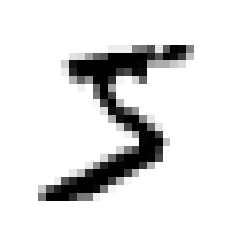

In [15]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [16]:
y[0]

'5'

Picture looks like 5. And label show it is 5. 

---

y is a string, which will be tough for the ML to deal with. Let's imput it to the integer.

In [17]:
y = y.astype(np.uint8)

##Train, test split

In [18]:
X_train, X_test, y_train, y_test = X[:600000], X[60000:], y[:60000], y[60000:]

Data is already shuffled, so we don't risk that some fold will be missing some digits. 

> Some ML can perform bad, if they get many similar instances in a row. But shuffling can be not such a good idea, when we're dealing with f.e. time-series data -> stock market prices, weatcher predictions etc. 